
"""" This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time. """"

"""Which genres are
most popular from
year to year? What
kinds of properties
are associated with
movies that have high
revenues?
"""


# Have movie budgets gone up over time & does a movie's budget reflect it's popularity?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling/Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
> Everyone knows movies cost a lot of money to make, but how have movie budgets changed over time, accounting for inflation? And just because a movie has a huge budget, does that mean it will be a hit at the box offices? We investigate with this dataset. 


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


## Data Wrangling/Data Cleaning


### General Properties

In [24]:
df = pd.read_csv('tmdb-movies.csv')
df.head()
# This gives me a good summurization of the dataset I choose. From here I can decide which columns will be useuful in my analysis
# and which ones I can get rid of
# Off the bat I am thinking of getting rid of imdb_id, budget, revenue, cast, homepage, director, tagline, keywords, overview, runtime,
# production_companies, release_date, vote_count, & vote_average



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
df.info()
# This is going to outline the data for me. I can see which columns have missing values, which are numbers, etc.
# I see that there are 10866 movie entries which I will be analyzing. This is good to know starting off.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [26]:
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
         'production_companies', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
# As I said before, I am not going to need these columns for my analysis so I will be dropping them

In [27]:
df.head()
# Look at the new dataset after I took out all columns I didn't need

,id,popularity,budget,revenue,original_title,genres,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2015


In [28]:
df.info()
# Figure out which remaining columns have missing values. It looks like genre is the only column that contains missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 594.3+ KB


In [29]:
df[df.genres.isnull()]
# Check to see the which records have null values. 

,id,popularity,budget,revenue,original_title,genres,release_year
424,363869,0.244648,0,0,Belli di papÃ,NaN,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,NaN,2014
1712,21634,0.302095,0,0,Prayers for Bobby,NaN,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,NaN,2009
2370,127717,0.081892,0,0,Freshman Father,NaN,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,2010
2853,57892,0.130018,0,0,Vizontele,NaN,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,NaN,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,NaN,2012


In [30]:
df = df[pd.notnull(df['genres'])] 
# I am removing the rows where these rows where the genre is a null value. 
# Since there wasn't many of these entries I figured I could take them out and it wouldn't change my findings that much

In [31]:
df[df.genres.isnull()]
# Checking to make sure this worked. 

,id,popularity,budget,revenue,original_title,genres,release_year


In [32]:
df.info()
#Checking to see if my dataset is now complete for what I am trying to analyze

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
id                10843 non-null int64
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
genres            10843 non-null object
release_year      10843 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 677.7+ KB


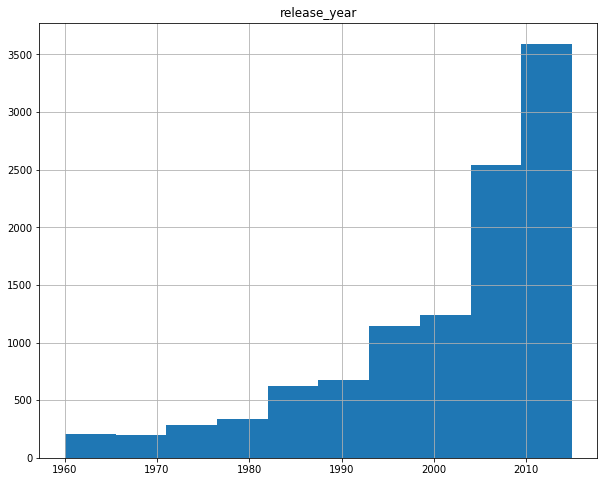

In [33]:
df.hist('release_year', figsize=(10, 8));
#Check out a histogram of what the release years look like

<a id='eda'></a>
## Exploratory Data Analysis


### Have movie revenues/budgets been rising over time?

Text(0.5,1,'Revenue Trend Over The Years')

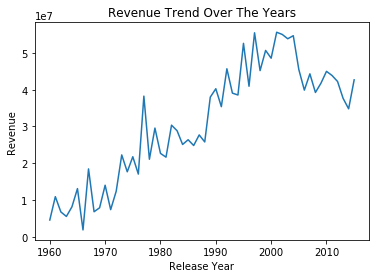

In [38]:

#Revenue of Movies released over the years 
Groupby_trend = df.groupby('release_year').mean()
Popularity_Trend = Groupby_trend['revenue'].plot.line()
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Revenue Trend Over The Years')

In [ ]:
# From the graph above, we can see that the revenue trend in movies over time has risen fairly steadly up until about the early
# 2000's where it started to dip a little bit. I find this interesting because I would have pictured movie revenues to continually
# Increase as movies become larger box office hits, but maybe it says somethign about how less people are going to movies 
# because they prefer things such as Netflix

Text(0.5,1,'Budget Trend Over The Years')

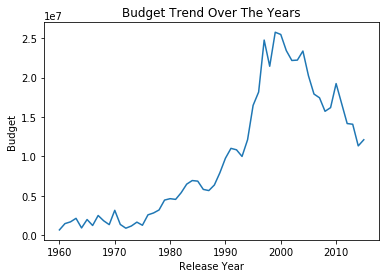

In [35]:

#Budgets of Movies released over the years 
Groupby_trend = df.groupby('release_year').mean()
Popularity_Trend = Groupby_trend['budget'].plot.line()
plt.xlabel('Release Year')
plt.ylabel('Budget')
plt.title('Budget Trend Over The Years')

In [ ]:
# From the graph above we can see that budgets in movies went up significantly up until 2000 then started to hit a decline. It 
# is almost an identical trend to the one we saw with the revenue which makes sense. If comapnies put less into their movies,
# they typically will get less out of them

### Is popularity correlated with revenue and budget 

In [39]:
# Looking at the correlations between these variables. We see that revenue has a strong correlation with popularity and budget

Mean_trend.corr(method='pearson')

,id,popularity,budget,revenue
id,1.000000,0.611922,0.099747,0.151986
popularity,0.611922,1.000000,0.668552,0.759548
budget,0.099747,0.668552,1.000000,0.906076
revenue,0.151986,0.759548,0.906076,1.000000


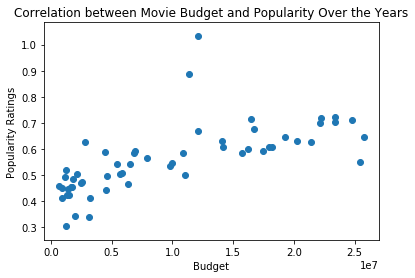

In [41]:
# To visualize this we can use a scatter plot
# Correlation between Budget and popularity
plt.scatter(x=Mean_trend['budget'], y=Mean_trend['popularity'])
plt.xlabel('Budget')
plt.ylabel('Popularity Ratings')
plt.title('Correlation between Movie Budget and Popularity Over the Years');

In [ ]:
# You can see from the scatterplot above that besides from a couple outliers, budget and popularity are pretty closely correlated

In [ ]:
# Lets try the same but with revenue

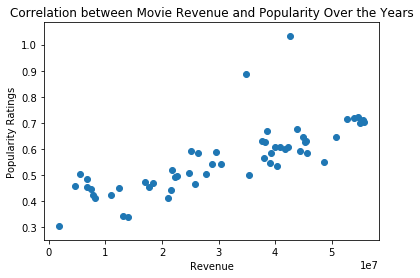

In [42]:
# Correlation between Revenue and popularity
plt.scatter(x=Mean_trend['revenue'], y=Mean_trend['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity Ratings')
plt.title('Correlation between Movie Revenue and Popularity Over the Years');

In [ ]:
# Here we can say somethign similar. It looks liek revenue and popularity are pretty closely correleated between a few outliers. 

<a id='conclusions'></a>
## Conclusions

Doing these tests has proved to be quite interesting than I initally thought. I learned about the dip in movie budgets/revenues in the early 2000's and am interested to go research why that may be. I am also curious to see data from 2010 on as websites like Netflix have become much more popular and it seems that less and less people are going to movies. 
